#  <center>SNP 정보를 활용한 유전체 품종 분류 모델링에 대한 연구 </center> 

## <center> 강민수, 이상우, 이상준</center>



### <center> 국민대학교 </center>
### <center> AI빅데이터융합경영학과</center>
#### <center> daro980722@gmail.com, sangwoo710@naver.com, chukgoo11@naver.com</center>


## <center> 초록 </center>

  유전체 염기서열에서 획득한 유전체 변이 정보인 Single Nucleotide Polymorphism 정보는 특정 개체 및 특정 품종에 따라 다른 변이 양상으로 나타난다. 즉 동일개체를 확인하거나, 동일 품종을 구분하는데 활용이 가능하다. 유전체 변이정보를 이용해서 정확히 유전체 품종을 분류해 내는 것은 농축수산 현장에서 품종의 다양성 혹은 품종 부정유통을 방지하는데 도움을 줄 수 있다.
본 논문에서는 유전체 품종 분류 문제를 해결하기 위하여 개체 정보와 SNP 정보를 이용하여 A,B,C 품종을 분류하는 최고의 품종구분 정확도를 획득하는 것을 목표로 데이터 기반 모델을 연구하였다. 분류 모델은 VotingClassifier를 활용하였으며, 오버피팅 문제를 감안하여 최소한의 파라미터 최적화를 진행하였고 SNP 정보를 활용해 Feature Engineering을 수행하였다. 연구에 활용한 데이터는 각 유전체 개체의 개체정보 및 15개의 SNP 정보로 구성되어 있으며, 약 300여개의 Train 데이터로 모델 학습 후 가장 높은 Macro F1 score를 갖는 모델들을 선별하여 이용하였다. 본 연구를 통해서 많은 SNP 정보를 통해 분류하는 것보다, 보다 더 적은 SNP 정보를 이용한 데이터 기반 분류 모델의 적용 가능성을 살펴 볼 수 있었다. 

# 1. 서론

최근 시장에서 세 품종이 동시에 유통될 때, 각 품종의 고유한 생산푹목의 가치 및 가격 산정에 부정유통이 발생하고 있다. 이에 따라 부정유통이 차단되기 위해 현장에서 사용 할 수 있는 AI 모델에 대한 수요가 증가하고 있다. 정확한 품종 분류를 통해 품종의 다양성 혹은 품종 부정유통을 방지할 수 있고, 나아가 동일개체 확인, 동일 품종을 구분하는데 도움을 줄 수 있다.

본 논문에서는 유전체 품종 분류 문제를 해결하기위해 데이터 기반의 분류 모델을 연구하였다. 유전체 개체 정보 및 SNP 정보 데이터를 바탕으로 Feature Engineering을 거친 데이터를 입력받아 유전체의 정확한 품종을 분류해내는 모델을 개발하였다.
연구에 활용된 데이터는 유전체의 개별 개체 정보 및 SNP 정보로 구성된 데이터로서, 보다 다양한 측면에서 SNP 정보를 활용하기 위하여 SNP 명, SNP 염색체 정보, SNP Genetic distance, SNP 각 마커의 유전체상 위치 정보 등을 참고한 변수들을 추가적으로 생성하여 활용하였다. 

모델 개발에 있어서는 다양한 sklearn에 내장된 모델들을 실험해 보았고, 결과적으로 단일 모델이 아닌 여러 모델들을 이용하는 것이 좋은 분류 성능을 낼 것으로 판단되어 BaggingClassifier, DecisionTreeClassifier, RidgeClassifier, XGBClassifier, LGBMClassifier, GradientBoostingClassifier, SVC, RidgeClassifierCV 및 RandomForestClassifier를 기반으로 하는 Hard voting 방식의 VotingClassifier를 최종 모델로 산정하였다. 

모델들의 성능을 실험할 때, Optuna를 이용해 하이퍼파라미터 튜닝을 하여 진행하였으나 데이터 셋의 크기 및 Feature들의 특성으로 인해 오버피팅이 발생하여 최종적으로는 random seed만 고정한 채 실험을 진행하였다. Sklearn에 내장된 대부분의 모델들을 전부 실험해 보았으며 그 결과 최종적으로 위 모델들이 가장 높은 Macro F1 score를 기록하여 사용하게 되었다. 양이 적고, 분류 클래스가 불균형인 데이터 셋의 특징에 초점을 두어 Data Oversampling, 여러 모델들을 이용한  VotingClassifier 그리고 최소한의 하이퍼파라미터 튜닝을 진행하여 최종 모델의 성능과 분류 정확도를 향상시킬 수 있었다.

# 2. 데이터 분석 및 처리

## 2.1 데이터 개요

연구에 활용된 데이터는 유전체 정보 품종 분류 AI 경진대회의 일환으로 충남대학교, 티엔티리써치, AI Frenz에서 제공하는 유전체의 개별 개체 정보 및 SNP 데이터를 활용하였다. 연구 과정에서 약 300여개의 유전체 정보 데이터를 모델 학습을 위한 트레이닝 셋으로 사용하였고, 모델의 성능 평가를 위한 검증 셋을 따로 구축하지는 않았다.


## 2.2 라이브러리 구성 및 데이터 로드

데이터 분석 및 분류 모델 학습을 위하여 Sklearn, Imblearn, Pandas, Numpy, LightGBM, XGBoost등의 기본적인 라이브러리들을 활용하였으며, 추가적으로 Category_encoder를 이용하기 위해 category_encoders 라이브러리를 활용하였다.
CSV 형식으로 기록된 데이터셋을 데이터프레임 형식으로 로드하여, `train`(트레이닝셋), `test`(테스트셋) 변수로 활용하였다.
결과 재현을 위해 seed 고정을 추가적으로 수행하였다.

In [ ]:
#구글 드라이브 연결
from google.colab import drive
drive.mount('/content/gdrive')

#코랩 환경 경로 설정 -> 자신에게 맞는 경로로 설정정
DATA_PATH = '/content/gdrive/MyDrive/유전체공모전/data/'

# 코랩 기준 필요 라이브러리 설치

# Category_encoders 설치
!pip install category_encoders

#Base & visualization
import pandas as pd
import random
import os
import numpy as np
import warnings
import matplotlib.pylab as plt
import seaborn as sns

#sklearn module & utils
from tqdm.notebook import tqdm
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import StratifiedKFold , KFold, train_test_split, cross_val_score, cross_validate
warnings.filterwarnings('ignore') 

#Scaling
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding
import category_encoders as ce

#Sampling
from imblearn.over_sampling import BorderlineSMOTE

#Modeling
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, VotingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

#Seed 고정
class CFG:
    SEED = 26

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(CFG.SEED) # Seed 고정

train = pd.read_csv(DATA_PATH + 'train.csv')
test = pd.read_csv(DATA_PATH + 'test.csv')

`train` 및 `test`는 다음과 같은 형태로 구성되어 있다. 먼저 `train`에는 총 262개의 샘플이 존재하며, 각 샘플은 개체 정보 및 15개의 SNP 정보를 가지고 있다. 
이와 대비하여 `test`는 총 175개의 샘플로 구성되어있으며, 두 데이터 모두 결측치는 존재하지 않는다. 

In [ ]:
#@title 데이터 기초 구성 예시

print("\033[95m" + "<train 데이터 첫 5행 확인>")
print("\033[0m")
print(train.head())
print("-----------------------------------------------------------------")
print("\033[95m" + "<train 데이터 마지막 5행 확인>")
print("\033[0m")
print(train.tail())
print("-----------------------------------------------------------------")
print("\033[95m" + "<train 데이터 정보>")
print("\033[0m")
print(train.info())
print("-----------------------------------------------------------------")
print("\033[95m" + "<train 데이터 크기>")
print("\033[0m")
print(train.shape)
print("-----------------------------------------------------------------")
print("-----------------------------------------------------------------")
print("\033[95m" + "<test 데이터 첫 5행 확인>")
print("\033[0m")
print(test.head())
print("-----------------------------------------------------------------")
print("\033[95m" + "<test 데이터 마지막 5행 확인>")
print("\033[0m")
print(test.tail())
print("-----------------------------------------------------------------")
print("\033[95m" + "<test 데이터 정보>")
print("\033[0m")
print(test.info())
print("-----------------------------------------------------------------")
print("\033[95m" + "<test 데이터 크기>")
print("\033[0m")
print(test.shape)

<train 데이터 첫 5행 확인>

          id  father  mother  gender  trait SNP_01 SNP_02 SNP_03 SNP_04  \
0  TRAIN_000       0       0       0      2    G G    A G    A A    G A   
1  TRAIN_001       0       0       0      2    A G    A G    C A    A A   
2  TRAIN_002       0       0       0      2    G G    G G    A A    G A   
3  TRAIN_003       0       0       0      1    A A    G G    A A    G A   
4  TRAIN_004       0       0       0      2    G G    G G    C C    A A   

  SNP_05  ... SNP_07 SNP_08 SNP_09 SNP_10 SNP_11 SNP_12 SNP_13 SNP_14 SNP_15  \
0    C A  ...    A A    G G    A A    G G    A G    A A    A A    A A    A A   
1    A A  ...    A A    G A    A A    A G    A A    G A    G G    A A    A A   
2    C C  ...    A A    G A    G A    A G    A A    A A    A A    A A    A A   
3    A A  ...    G G    A A    G G    A G    G G    G G    G G    A A    G G   
4    C C  ...    A A    A A    A A    G G    A A    A A    A G    A A    G A   

  class  
0     B  
1     C  
2     B  
3     A

## 2.3 데이터 분석 및 전처리

### 2.3.1  탐색적 자료 분석 (EDA)

데이터의 클래스 분포를 확인하기 위하여 트레이닝 데이터 `train`에 대해 다음과 같이 살펴보았다. 먼저 X와 Y로 데이터를 분리한 뒤 분석에 필요없는 ID column을 제거해주었다. 그 후 train_x, train_y, test_x 변수에 저장해주었다. 데이터의 A,B,C Target Class 분포를 시각화하여 본 결과, 클래스의 불균형을 확인할 수 있다. 이를 통하여 추후에 클래스 불균형을 해소시키기 위한 Data Oversampling이 필요함을 알 수 있었다. 

In [ ]:
#X Y 데이터분리 및 id column drop
def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x

train_x, train_y = get_x_y(train)
test_x = get_x_y(test)

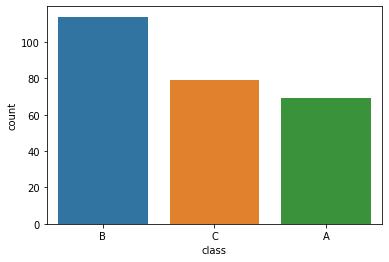

In [ ]:
#class imbalanced -> Oversampling 적용
sns.countplot(train_y)

### 2.3.2  필요없는 Column 제거

데이터 분석을 통해 모든 데이터에서 동일한 값을 가지는 필요없는 column이 존재함을 확인하였다. 필요없는 column이 존재하는 경우, 모델 학습에 있어서 부정적인 영향을 미치기 때문에 이를 처리하기 위하여 다음과 같이 해당 column을 단순 drop 하였다.

In [ ]:
#train_x 데이터를 확인해본 결과, 동일한 값을 가지는 columns 제거 -> 모델링에 좋지 않은 영향을 줄 것으로 판단 
train_x = train_x.drop(columns=['father','mother','gender'])
test_x = test_x.drop(columns=['father','mother','gender'])

# 3. 모델링을 위한 데이터셋 구축

## 3.1 성능 개선을 위한 Feature engineering

기존 원본 데이터는 개체 정보와 15개의 SNP 정보만이 존재하므로 보다 정확한 품종 분류를 위해서 경진대회 주최측에서 제공한 SNP_info정보를 이용해 추가적인 파생변수를 만드는 것이 필요하다고 판단하였다.
파생변수 생성을 위해 활용한 SNP_info 정보는 다음과 같다.

1. name(SNP 명) & chrom(염색체 정보)
2.  chrom(염색체 정보)
3.  SNP Total combination
4. cm(Genetic distance)
5. SNP G,C,A matehmatical info




In [ ]:
train_x['2_BTA'] = train_x['SNP_01']
train_x['chrom_6'] = train_x['SNP_02'] + '-'+ train_x['SNP_03'] + '-' + train_x['SNP_04'] + '-' + train_x['SNP_05'] + '-' + train_x['SNP_06'] + '-' + train_x['SNP_07'] + '-' + train_x['SNP_08'] + '-' + train_x['SNP_09']
train_x['6_ARS_Parent'] = train_x['SNP_02']
train_x['6_ARS_BFGL'] = train_x['SNP_03'] + '-' + train_x['SNP_04'] + '-' + train_x['SNP_09']
train_x['6_BOVINE'] = train_x['SNP_05'] + '-' + train_x['SNP_06'] + '-' + train_x['SNP_08']
train_x['6_HAPMAP'] = train_x['SNP_07']
train_x['7_BTB'] = train_x['SNP_10']
train_x['8_ARS'] = train_x['SNP_11']
train_x['chrom_9'] = train_x['SNP_12'] + '-' + train_x['SNP_13'] + '-' + train_x['SNP_14']
train_x['9_HAPMAP'] = train_x['SNP_12'] + '-' + train_x['SNP_14']
train_x['9_BTB'] = train_x['SNP_13']
train_x['10_BOVINE'] = train_x['SNP_15']
train_x['SNP_total'] = train_x['SNP_01'] + '-' + train_x['SNP_02'] + '-' + train_x['SNP_03'] + '-' + train_x['SNP_04'] + '-' + train_x['SNP_05'] + '-' + train_x['SNP_06'] + '-' + train_x['SNP_07'] + '-' + train_x['SNP_08'] + '-' + train_x['SNP_09'] + '-' + train_x['SNP_10'] + '-' + train_x['SNP_11'] + '-' + train_x['SNP_12'] + '-' + train_x['SNP_13'] + '-' + train_x['SNP_14'] + '-' + train_x['SNP_15'] 

In [ ]:
test_x['2_BTA'] = test_x['SNP_01']
test_x['chrom_6'] = test_x['SNP_02'] + '-'+ test_x['SNP_03'] + '-' + test_x['SNP_04'] + '-' + test_x['SNP_05'] + '-' + test_x['SNP_06'] + '-' + test_x['SNP_07'] + '-' + test_x['SNP_08'] + '-' + test_x['SNP_09']
test_x['6_ARS_Parent'] = test_x['SNP_02']
test_x['6_ARS_BFGL'] = test_x['SNP_03'] + '-' + test_x['SNP_04'] + '-' + test_x['SNP_09']
test_x['6_BOVINE'] = test_x['SNP_05'] + '-' + test_x['SNP_06'] + '-' + test_x['SNP_08']
test_x['6_HAPMAP'] = test_x['SNP_07']
test_x['7_BTB'] = test_x['SNP_10']
test_x['8_ARS'] = test_x['SNP_11']
test_x['chrom_9'] = test_x['SNP_12'] + '-' + test_x['SNP_13'] + '-' + test_x['SNP_14']
test_x['9_HAPMAP'] = test_x['SNP_12'] + '-' + test_x['SNP_14']
test_x['9_BTB'] = test_x['SNP_13']
test_x['10_BOVINE'] = test_x['SNP_15']
test_x['SNP_total'] = test_x['SNP_01'] + '-' + test_x['SNP_02'] + '-' + test_x['SNP_03'] + '-' + test_x['SNP_04'] + '-' + test_x['SNP_05'] + '-' + test_x['SNP_06'] + '-' + test_x['SNP_07'] + '-' + test_x['SNP_08'] + '-' + test_x['SNP_09'] + '-' + test_x['SNP_10'] + '-' + test_x['SNP_11'] + '-' + test_x['SNP_12'] + '-' + test_x['SNP_13'] + '-' + test_x['SNP_14'] + '-' + test_x['SNP_15']

## 3.1.2 공백 제거

SNP 정보에 불필요한 공백이 존재하여 공백을 제거해주었다.

In [ ]:
def blank(data_tr, data_te, columns):
    for i in columns :
        data_tr[i] = data_tr[i].apply(lambda x : x.replace(" ",""))
        data_te[i] = data_te[i].apply(lambda x : x.replace(" ",""))
        
    return data_tr, data_te

target_columns = train_x.iloc[:,16:].columns.to_list()
train_x.iloc[:,16:], test_x.iloc[:,16:] = blank(train_x.iloc[:,16:], test_x.iloc[:,16:], target_columns)

## 추가 Feature engineering

본 Feature는 아래 참고문헌을 활용해 생성하였다.

참고문헌 : [0]

In [ ]:
train_x['concat'] = train_x.iloc[:,1:16].sum(axis=1).apply(lambda x : x.replace(" ",""))
train_x['numGC'] = train_x['concat'].apply(lambda x : x.count('C')+x.count('G'))
train_x['numA'] = train_x['concat'].apply(lambda x : x.count('A'))
train_x['numGC^2'] = train_x['numGC']**2
train_x['sub'] = train_x['numGC'] - train_x['numA']
train_x['H'] = train_x['numGC']*3 + train_x['numA']*2

In [ ]:
test_x['concat'] = test_x.iloc[:,1:16].sum(axis=1).apply(lambda x : x.replace(" ",""))
test_x['numGC'] = test_x['concat'].apply(lambda x : x.count('C')+x.count('G'))
test_x['numA'] = test_x['concat'].apply(lambda x : x.count('A'))
test_x['numGC^2'] = test_x['numGC']**2
test_x['sub'] = test_x['numGC'] - test_x['numA']
test_x['H'] = test_x['numGC']*3 + test_x['numA']*2

## 3.2 모델 학습을 위한 데이터 구성

데이터 내의 trait 변수는 분석결과 numeric 변수가 아닌 categorical 변수로 취급해야 맞다고 판단하여 데이터 type 변환을 수행하였다.

또한, numerical 변수들은 서로 다른 scale을 가질 시 모델링 시에 좋지 못한 영향을 줄 것으로 판단하여 scaling을 진행하기 전에 categorical 변수와 numerical 변수를 구분해주고 최종적으로 StandardScaler를 이용하여 scaling을 수행하였다. 

추가적으로, CatBoostClassifier 모델의 내부적인 encoding 방식을 활용하기 위해 catboost_encoder를 함수로 구현하여 데이터 셋에 적용시켜 주었다. 그 결과, 모델 성능에 많은 향상이 있었다.

EDA를 통해 클래스 불균형이 존재함을 알아내었고 이를 해소시키기 위해 Oversampling 방식 중, 데이터 셋 내 각 데이터의 경계값을 기준으로 sampling을 해주는 BorderlineSMOTE 방식을 이용하였다.

Target 변수인 class 변수는 Label-Encoding하여 변환된 값을 학습에 사용하였다.

In [ ]:
#@title 데이터 구성을 위한 코드
train_x['trait'] = train_x['trait'].astype('object')
test_x['trait'] = test_x['trait'].astype('object')

cat_features = train_x.select_dtypes(include=['object']).columns.to_list()
num_features = train_x.select_dtypes(exclude=['object']).columns.to_list()

scaler = StandardScaler()
train_x[num_features] = scaler.fit_transform(train_x[num_features])
test_x[num_features] = scaler.transform(test_x[num_features])

def catboost_encoder_multiclass(X,X_t,y):
    y = y.astype(str)
    enc = ce.OneHotEncoder().fit(y)
    y_onehot = enc.transform(y)
    class_names = y_onehot.columns
    X_obj = X.select_dtypes('object')
    X_t_obj = X_t.select_dtypes('object')
    X = X.select_dtypes(exclude='object')
    X_t = X_t.select_dtypes(exclude='object') 
    for class_ in class_names:
        enc = ce.CatBoostEncoder()
        enc.fit(X_obj,y_onehot[class_])
        temp = enc.transform(X_obj)
        temp_t = enc.transform(X_t_obj)
        temp.columns = [str(x)+'_'+str(class_) for x in temp.columns]
        temp_t.columns = [str(x)+'_'+str(class_) for x in temp_t.columns]
        X = pd.concat([X,temp],axis=1)
        X_t = pd.concat([X_t,temp_t],axis=1)
      
    return X, X_t

train_x, test_x = catboost_encoder_multiclass(train_x,test_x,train_y)

# Class 불균형 문제 해결
train_x,train_y = BorderlineSMOTE(random_state=CFG.SEED).fit_resample(train_x,train_y)

class_le = LabelEncoder()
train_y = class_le.fit_transform(train_y)

# 4. 예측 모델 구성 및 실험

### 4.1.0 사용한 모델 종류
본 연구에서는 학습 시 아래와 같은 여러 알고리즘들을 기반으로 실험을 시행하였다. **<br/> - BaggingClassifier <br/> - DecisionTreeClassifier <br/> - RandomForestClassifier <br/> - GradientBoostingClassifier <br/> - XGBClassifier <br/> - LGBMClassifier <br/> - SVC <br/> - RidgeClassifier <br/> - RidgeClassifierCV**

### 4.1.1 BaggingClassifier

#### 배깅(Bagging (1), Bootstrap aggregating(2)) 모델 :  

- 다양한 분류기를 만드는 한 가지 방법은 각기 다른 훈련 알고리즘을 사용하는 것입니다.
또 다른 방법은 같은 알고리즘을 사용하지만 훈련 세트의 서브셋을 무작위로 구성하여 분류기를 각기 다르게 학습시키는 것입니다.
훈련 세트에서 중복을 허용하여 샘플링하는 방법을 배깅 bagging (bootstrap aggregating의 줄임말)이라 하며,
중복을 허용하지 않고 샘플링하는 방식을 페이스팅 pasting 이라고 합니다.

- 학습 데이터 -> 각각의 학습 데이터 (랜덤 데이터 추출) -> 각각의 모델 -> 배깅 모델 (회귀: 평균값, 분류: 다수결 투표로 가장 많이 나온값) -> 예측값
과적합 방지  

- 배깅과 페이스팅에서는 같은 훈련 샘플을 여러 개의 예측기에 걸쳐 사용할 수 있습니다. 하지만 배깅만이 한 예측기를 위해 같은 훈련 샘플을 여러 번 샘플링 할 수 있습니다.

(1) Bootstrap: Boot + strap 으로 긴 부츠의 뒷 부분에 달린 고리  
(2) aggregating: 모음

참고문헌 : [1]

### 4.1.2 DecisionTreeClassifier
결정트리란 의사결정 나무를 만드는 것이다. 각 특성들이 노드가 되고, 중요한것을 상위에서 시작해 분기해 나가면서 그에 맞는 예측을 하는 모델이다. 가지가 뻗어나가는 트리 모양이어서 이름이 붙여졌다.

![이미지](https://velog.velcdn.com/images%2Fdlskawns%2Fpost%2F434ed1db-c0cf-4f99-a7e0-853127bb87ff%2Fimage.png)
이미지 출처: https://www.youtube.com/watch?v=_L39rN6gz7Y

스탯 퀘스트의 이미지를 이용해서 설명하자면, 맨 위 루트노드부터 정해진 질문에 대한 True or False 답을 내리고, 그 이후에도 추가적인 질문에 대한 답을 내려 최종적으로 의사 결정을 하도록 하여 예측하는 모델이다.

- Decision Tree의 작동 원리, 장단점(특성 상호작용)  
특성들 간의 중요도를 파악해 해당 특성을 Root Node(최상위 노드)로 선정하고, 이후 나머지 특성들에 대해 분할 후 자식노드의 불순도를 계산한다. 마지막으로 각 속성에 대한 Imformation Gain 계산 후 Imformation Gain이 최대가 되는 분기조건을 찾아 분기한다. 이 과정을 모든 leaf 노드의 불순도가 0이 될 때까지 반복한다.
결정트리의 장점으로는 이해하고 해석하기 쉽다는 점,화이트 박스 모델을 사용하여 결과를 해석하는데 수월하다는 점을 대표적으로 들 수 있다다. 
반면, 단점으로는 지나치게 복잡한 트리를 만들어 과적합에 빠질 가능성이 높다는 점,데이터의 작은 변화로 인해 완전히 다른 트리가 만들어 질 수 있고 이로 인해 트리가 불안정할 수 있다는 점이 있다.

- Decision Tree 모델의 용어  
노드(Node): 각 특성(feature들 의미)  
엣지(Edge): 분기할 때의 선을 의미  
지니 불순도(Gini Impurity): 해당 feature에 대한 data를 통해 target을 예측할 때, 얼마나 target과 관련없는 답이 섞여있는지를 파악하는 척도  
엔트로피(Entropy): 열역학의 용어인데, 말하자면 무질서의 정도이다. 보통은 지니 불순도를 더 활용하는 것으로 보인다.

참고문헌 : [2]

### 4.1.3 RandomForestClassifier

- 기본 결정트리는 해당 데이터에 대해 맞춰서 분류를 진행한 것이기 때문에 과적합 현상이 자주 나타났다.
그에 따라 이를 개선하기 위해 2001년 앙상블 기법으로 고안된 것이 랜덤 포레스트이다.
- 훈련 과정에서 구성한 다수의 결정 트리들을 랜덤하게 학습시켜 분류 또는 회귀의 결과도출에 사용한다.
즉, 특정 특성을 선택하는 트리를 여러개 생성하여 이들을 기반으로 작업을 수행하는 것이다.
- 각각의 트리가 독립적으로 학습하기 때문에 학습과정을 병렬화할 수 있다.
- 일반적인 의사결정트리는 Tree Correlation이라고 하는 특정 feature 하나가 정답에 많은 영향을 주게되면 대부분의 결과치가 유사하게 나타나는 문제점이 있었다.
하지만 랜덤 포레스트에서는 그러한 문제를 해결했고, 파라미터의 개수가 적어 튜닝도 쉽다.
- 타깃 예측을 잘하며 각각이 구별되는 여러개의 트리를 만들기 위해 무작위성이 부여된다.
- 대표적인 '배깅' 모델이다. (cf. 배깅(Bagging)은 bootstrap aggregating의 줄임말이다.)
- 결정트리의 단점을 보완하고 장점은 그대로 가지고 있는 모델이어서 별다른 조정 없이도 괜찮을 결과를 만들어낸다.
랜덤하게 만들어지기 때문에 random_state를 고정해야 같은 결과를 볼 수 있다.
- 트리 개수가 많아질 수록 시간이 더 오래 걸린다.

참고문헌 : [3]

### 4.1.4 GradientBoostingClassifier

그래디언트 부스팅 (Gradient Boosting, 의사 결정 나무의 앙상블)
- 의사 결정 나무 모델에 대한 부스팅 모델 + 이전 모델에 의한 가중치가 주어진 데이터를 훈련시키는 것이 아닌 이전 모델에 의한 오차를 다음 모델에 훈련 시킴 (데이터가 아닌 오차를 훈련 시킴)

- 앙상블에 이전까지의 오차를 보정하도록 예측기를 순차적으로 추가, 이전 예측기가 만든 잔여 오차 (residual error)에 새로운 예측기를 학습시키는 알고리즘

특징
- greedy 알고리즘
- scale에 강한 모델
- 다양한 loss function을 지원(huber)
- 오버피팅에 약함
- 속도가 느림, 계산 리소스가 높음

참고문헌 : [4]

### 4.1.5 XGBClassifier

- XGBoost는 최적화된 그레디언트 부스팅 구현이 가능한 파이썬 라이브러리이다. XGBoost는 빠른 속도, 확장성, 이식성이 특징이며 캐글 등 머신러닝 경연 대회에서 우승 후보들이 사용하는 도구로 성능이 아주 좋다.

- 이전 모델이 과소적합한 샘플에 가중치를 줘서 다음 모델에서 예측 정확도를 높이는 방식으로 모델을 보완해가는 부스팅 기법을 사용한다.

- GBM보다 빠르고 조기종료가 가능하며 과적합 방지가 가능하다. 또한 분류와 회귀 둘 다 사용이 가능하다. 사이킷런에서 제공하지 않기 때문에 따로 설치가 필요하다.

참고문헌 : [5]

### 4.1.6 LGBMClassifier

![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FuCWi1%2Fbtq9jFAgt8u%2FX2iCxCZkMgQRPOy11jiwFk%2Fimg.png)  
이미지 출처: https://www.slideshare.net/GabrielCyprianoSaca/xgboost-lightgbm
- LightGBM은 트리 기준 분할이 아닌 리프 기준 분할 방식을 사용한다. 트리의 균형을 맞추지 않고 최대 손실 값을 갖는 리프 노드를 지속적으로 분할하면서 깊고 비대칭적인 트리를 생성한다. 이렇게 하면 트리 기준 분할 방식에 비해 예측 오류 손실을 최소화할 수 있다.

장점
- 학습하는데 시간이 짧다. (통상 XGBoost 학습속도의 1.3~1.5배)
- 메모리 사용량이 상대적으로 적다.
- 대용량 데이터 처리 가능

단점
- 적은 데이터셋(공식문서 기준 만건 이하)에서는 오버피팅 발생 가능

참고문헌 : [6]

### 4.1.7 SVC

SVM(Support Vector Machine, SVC(분류), SVR(회귀))
- 선형 분류, 비선형 분류, 회귀, 이상치 탐색에도 사용할 수 있는 다목적 머신 러닝 모델
- 클래스가 다른 데이터들을 가장 큰 마진(margin)으로 분리해내는 선 또는 면을 찾아내는 것
- 기본 아이디어 : 클래스 사이에 가장 폭 넓은 도로를 찾는 것
- 특히 복잡한 분류 문제에 잘 들어맞으며 작거나 중간 크기의 데이터셋에 적합 특성이 비슷하고 스케일이 비슷할 때 성능이 좋다

참고문헌 : [7]


### 4.1.8 RidgeClassifier

- 선형 모델(Linear model)의 예측력 혹은 설명력을 높이기 위해 여러 정규화(regularization) 방법들을 사용한다.
-  기본 선형모델을 사용하다 보면 overfitting이 발생할 수 있다. Overfitting된 경우 데이터에 매우 적합되어 극단적으로 오르락내리락하는 그래프가 생성되며, 이를 표현하는 선형 회귀의 계수 값이 매우 크게 나타난다. 이렇게 Variance가 큰 상황을 막기 위해, 계수 자체가 크면 페널티를 주는 수식을 추가한 것이 Ridge regression이다. 
x**n 과 같이 차원이 큰 파라미터를 사람이 인위적으로 소거할 수도 있지만, Ridge regression은 오차를 최소화하는 함수에 페널티를 줌으로써 보다 부드럽게 계수를 선택하는 차이가 있다. Ridge regression은 기본 선형 모델을 regularize 하여 좀 더 좋은 performance를 내기 위해 시도해볼 수 있는 아주 기본적인 기법이다.
- Ridge regression 자체는 선형 모델이지만 같은 원리를 사용하여 분류 문제에도 적용할 수 있게 만든 알고리즘이 Ridge classifier이다.

참고문헌 : [8]

### 4.1.9 RidgeClassifierCV

- 선형 모델(Linear model)의 예측력 혹은 설명력을 높이기 위해 여러 정규화(regularization) 방법들을 사용한다.
-  기본 선형모델을 사용하다 보면 overfitting이 발생할 수 있다. Overfitting된 경우 데이터에 매우 적합되어 극단적으로 오르락내리락하는 그래프가 생성되며, 이를 표현하는 선형 회귀의 계수 값이 매우 크게 나타난다. 이렇게 Variance가 큰 상황을 막기 위해, 계수 자체가 크면 페널티를 주는 수식을 추가한 것이 Ridge regression이다. 
x**n 과 같이 차원이 큰 파라미터를 사람이 인위적으로 소거할 수도 있지만, Ridge regression은 오차를 최소화하는 함수에 페널티를 줌으로써 보다 부드럽게 계수를 선택하는 차이가 있다. Ridge regression은 기본 선형 모델을 regularize 하여 좀 더 좋은 performance를 내기 위해 시도해볼 수 있는 아주 기본적인 기법이다.
- Ridge regression 자체는 선형 모델이지만 같은 원리를 사용하여 분류 문제에도 적용할 수 있게 만든 알고리즘이 Ridge classifier이다.
- CV(cross validation)는 K-fold 교차 검증을 뜻하는 것인데, 이 원리는 간단히 말해 데이터를 train set과 test set으로 나누듯 지정된 k개로 나눈뒤 k번씩 자체적인 검증을 해 정확도를 올려준다. 데이터가 부족해 교차검증이 힘든경우에도 이를 통해 자체적인 교차검증을 할 수 있다. RidgeClassifier와는 다르게 교차 검증이 내장되어 있는 알고리즘이다.

참고문헌 : [9]

## 4.2 학습 및 성능평가


### 4.2.0 VotingClassifier

VotingClassifier는 "다수결 분류"를 뜻하는 것으로, 두 가지 방법으로 분류할 수 있습니다.

1. Hard Voting Classifier
  - 여러 모델을 생성하고 그 성과(결과)를 비교합니다. 이 때 classifier의 결과들을 집계하여 가장 많은 표를 얻는 클래스를 
최종 예측값으로 정하는 것을 Hard Voting Classifier라고 합니다.

2. Soft Voting Classifier
  - 앙상블에 사용되는 모든 분류기가 클래스의 확률을 예측할 수 있을 때 사용합니다.
각 분류기의 예측을 평균 내어 확률이 가장 높은 클래스로 예측하게 됩니다 (가중치 투표)

참고문헌 : [10]

### 4.2.1 앙상블방식
- 성능향상을 위하여 앙상블(Ensemble) 기법을 사용하였다. 앙상블은 모델의 일반화 성능 향상을 위해 널리 활용되는 기법으로 다수의 예측 모델을 조합하여 최종 예측을 수행함으로써 예측 정확도를 향상시킬 수 있다.
- 앙상블을 위하여 VotingClassifier를 이용하여
  - BaggingClassifier
  - DecisionTreeClassifier
  - RandomForestClassifier
  - GradientBoostingClassifier
  - XGBClassifier
  - LGBMClassifier
  - SVC
  - RidgeClassifier
  - RidgeClassifierCV 들을 Hard Voting 방식으로 앙상블을 진행하였였습니다.

In [ ]:
models = [
    ('bag', BaggingClassifier(random_state=CFG.SEED)),
    ('dt', DecisionTreeClassifier(random_state=CFG.SEED)),
    ('rc', RidgeClassifier(random_state=CFG.SEED)),
    ('xgb', XGBClassifier(random_state=CFG.SEED)),
    ('lgb', LGBMClassifier(random_state=CFG.SEED)),
    ('gb', GradientBoostingClassifier(random_state=CFG.SEED)),
    ('svc', SVC(random_state=CFG.SEED)),
    ('rcc', RidgeClassifierCV()),
    ('rf', RandomForestClassifier(random_state=CFG.SEED))
]

best_model  = VotingClassifier(models, voting='hard', weights=[1,1,1,2,1,1,1,1,2])
best_model.fit(train_x,train_y)

VotingClassifier(estimators=[('bag', BaggingClassifier(random_state=26)),
                             ('dt', DecisionTreeClassifier(random_state=26)),
                             ('rc', RidgeClassifier(random_state=26)),
                             ('xgb', XGBClassifier(random_state=26)),
                             ('lgb', LGBMClassifier(random_state=26)),
                             ('gb',
                              GradientBoostingClassifier(random_state=26)),
                             ('svc', SVC(random_state=26)),
                             ('rcc',
                              RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]))),
                             ('rf', RandomForestClassifier(random_state=26))],
                 weights=[1, 1, 1, 2, 1, 1, 1, 1, 2])

### 4.2.2 Macro-F1
- Macro-F1점수는 클래스별/레이블별 F1-score의 평균으로 정의됩니다.

Macro-F1의 특징
- Macro-F1 역시 0과 1사이의 값을 가지며 1에 가까울수록 좋습니다.
- Macro-F1의 경우 모든 class의 값에 동등한 중요성을 부여합니다. 즉, 비교적 적은 클래스(rare classes)에서 성능이 좋지 않다면, Macro-F1의 값은 낮게 나타날 것입니다.
- Macro-F1은  먼저 class와 label의 각각 F1-score를 계산한 뒤 평균내는 방식으로 작동합니다.



### 4.2.3 모델별 성능평가




In [ ]:
models = [
    (BaggingClassifier(random_state=CFG.SEED)),
    (DecisionTreeClassifier(random_state=CFG.SEED)),
    (RidgeClassifier(random_state=CFG.SEED)),
    (XGBClassifier(random_state=CFG.SEED)),
    (LGBMClassifier(random_state=CFG.SEED)),
    (GradientBoostingClassifier(random_state=CFG.SEED)),
    (SVC(random_state=CFG.SEED)),
    (RidgeClassifierCV()),
    (RandomForestClassifier(random_state=CFG.SEED))
]
models_name = [
    'BaggingClassifier',
    'DecisionTreeClassifier',
    'RidgeClassifier',
    'XGBClassifier',
    'LGBMClassifier',
    'GradientBoostingClassifier',
    'SVC',
    'RidgeClassifierCV',
    'RandomForestClassifier'
]

cv_scores = []
for i in range(len(models)):
  cv_score = cross_val_score(models[i], train_x, train_y, scoring='f1_macro', cv=5).mean()
  cv_scores.append(cv_score)
  print(models_name[i], cv_score)

BaggingClassifier 0.9563851225349838
DecisionTreeClassifier 0.9330261879890775
RidgeClassifier 0.9709130310194141
XGBClassifier 0.9651844688014901
LGBMClassifier 0.959105069231752
GradientBoostingClassifier 0.9650828507773443
SVC 0.9650224255917582
RidgeClassifierCV 0.9709130310194141
RandomForestClassifier 0.9650442825084091


|학습 모델|Macro-F1|
|------|:-----:|
|BaggingClassifier| 0.9563851225349838|
|DecisionTreeClassifier| 0.9330261879890775|
|RidgeClassifier| 0.9709130310194141|
|XGBClassifier| 0.9651844688014901|
|LGBMClassifier| 0.959105069231752|
|GradientBoostingClassifier| 0.9650828507773443|
|SVC| 0.9650224255917582|
|RidgeClassifierCV| 0.9709130310194141|
|RandomForestClassifier| 0.9650442825084091|

### 4.2.3 앙상블 후 성능평가

In [ ]:
models = [
    ('bag', BaggingClassifier(random_state=CFG.SEED)),
    ('dt', DecisionTreeClassifier(random_state=CFG.SEED)),
    ('rc', RidgeClassifier(random_state=CFG.SEED)),
    ('xgb', XGBClassifier(random_state=CFG.SEED)),
    ('lgb', LGBMClassifier(random_state=CFG.SEED)),
    ('gb', GradientBoostingClassifier(random_state=CFG.SEED)),
    ('svc', SVC(random_state=CFG.SEED)),
    ('rcc', RidgeClassifierCV()),
    ('rf', RandomForestClassifier(random_state=CFG.SEED))
]

best_model  = VotingClassifier(models, voting='hard', weights=[1,1,1,2,1,1,1,1,2])
best_model.fit(train_x,train_y)

cv_score = cross_val_score(best_model, train_x, train_y, scoring='f1_macro', cv=5).mean()
cv_score

0.9738376518811303

-  VotingClassifier로 Hard Voting ensemble 후 Macro-F1점수는 0.9738376518811303로 성능이 단일 모델들보다 월등히 오른 것을 확인할 수 있다.

|학습 모델|Macro-F1|
|------|:-----:|
|VotingClassifier| 0.9738376518811303|

## 4.3 결과 정리 및 분석

#### 아래의 표 1과 같이 개별 모델에서 가장 성능이 좋았던 건 RidgeClassifier, RidgeClassifierCV로 비교적 최신 모델인 XGB, LGBM 알고리즘 보다 Macro-F1 socre가 좋은 것을 알 수 있다.

#### 이러한 분석 결과를 바탕으로 다양한 계열의 알고리즘을 사용 및 앙상블을 진행 하였고 결과적으로 총 9개의 모델을 선택하였다.
  
#### 앙상블 이후의 경우에서는 단일 모델 9개보다 압도적인 성능을 보였으며 이는 단일 모델로는 높은 Macro-F1 score를 얻기 힘들다는 것을 방증한다.

#### 이번 연구에서는 학습할 수 있는 데이터 셋이 비교적 작아서 단일 모델로는 좋은 결과를 얻기 힘들었던 것으로 판단된다. 다양한 계열의 알고리즘으로 도출된 결과가 이질적인 부분이 있었는데 이러한 이질성들을 HardVoting 방식으로 오분류를 줄여준 것이 모델의 정확성을 올려준 것으로 판단된다.










표 1. 학습 모델에 따른 Macro-F1 score

|학습 모델|Macro-F1|
|------|:-----:|
|BaggingClassifier| 0.9563851225349838|
|DecisionTreeClassifier| 0.9330261879890775|
|RidgeClassifier| 0.9709130310194141|
|XGBClassifier| 0.9651844688014901|
|LGBMClassifier| 0.959105069231752|
|GradientBoostingClassifier| 0.9650828507773443|
|SVC| 0.9650224255917582|
|RidgeClassifierCV| 0.9709130310194141|
|RandomForestClassifier| 0.9650442825084091|
|VotingClassifier| 0.9738376518811303|

# 5. 결론

&nbsp;본 논문에서는 SNP정보 데이터를 바탕으로 유전체 품종을 분류하는 데이터 기반의 모델을 연구하였다.  
개발된 모델은 여러가지 알고리즘을 활용하였고 해당 모델들의 정확도와 성능을 향상시키기 위하여 VotingClassifier를 활용한 Hard Voting 앙상블(ensenble)기법을 활용하였다.  
&nbsp;앙상블 결과 개별 모델을 학습한 결과보다 가장 높은 Macro-F1 (0.9738376518811303)를 얻을 수 있었다.  
본 연구를 통해 최근에 가장 많이 사용하는 LGBM, CatBoost,XGB 뿐만아니라 분류 문제에 Bagging 및 Tree 계열 모델들의 활용 가능성을 알아볼 수 있었고 개발된 품종 분류 모델을 통해 유전체 품종 분류에 도움이 될 수 있을 것으로 생각한다.

# 6. 참고문헌
[0] 위키디피아[웹사이트]. (2023.02.04). URL : https://ko.wikipedia.org/wiki/GC_%ED%95%A8%EB%9F%89

[1] scikit learn[웹사이트]. (2023.02.04). URL: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier

[2] scikit learn[웹사이트]. (2023.02.04). URL: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn-tree-decisiontreeclassifier

[3] scikit learn[웹사이트]. (2023.02.04). URL: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

[4] scikit learn[웹사이트]. (2023.02.04). URL: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn-ensemble-gradientboostingclassifier

[5] XGBoost[웹사이트]. (2023.02.04). URL: https://xgboost.readthedocs.io/en/stable/parameter.html

[6] lightgbm[웹사이트]. (2023.02.04). URL: https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html

[7] scikit learn[웹사이트]. (2023.02.04). URL: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

[8] scikit learn[웹사이트]. (2023.02.04). URL: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier

[9] scikit learn[웹사이트]. (2023.02.04). URL: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifierCV.html#sklearn.linear_model.RidgeClassifierCV

[10] scikit learn[웹사이트]. (2023.02.04). URL: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier